In [113]:
%matplotlib inline 
from ggplot import *
import pandas as pd
from os import listdir

def get_counts(fn):
    return pd.read_csv(fn, header=None, names=["value", "count"])

def load_output_dir(dn):
    retval = {}
    for fn in listdir(dn):
        field = fn[len("unique_"):-1 * len(".csv")]
        #print field
        retval[field] = get_counts("{0}/{1}".format(dn, fn))
        
    return retval

def plot_bar(df, y, title, xlabel, ylabel, log=False):
    p = ggplot(aes(x="x", y=y), data=df) \
        + geom_bar(stat='identity') \
        + theme(axis_text_x = element_text(angle = 90, hjust = 0.5)) \
        + scale_x_discrete(limits=(0 - 0.5, df.shape[0] + 0.5), 
                           breaks=range(0, df.shape[0]), 
                           labels=df.index) \
        + ggtitle(title) \
        + xlab(xlabel) \
        + ylab(ylabel)
        
    if log:
        p = p + scale_y_log10()
        
    return p
    

In [114]:
# Subset of fields for developing graphs
testing_fields = ["dwc_country", "idigbio_etag", "dwc_locality", "dwc_recordNumber", "dwc_county"]

# small recordset
recordset = "00d9fcc1-c8e2-4ef6-be64-9994ca6a32c3"

# all of iDigBio ~4 min & 24 GB to load
#recordset = "idigbio"

In [115]:
counts = load_output_dir("../out_{0}".format(recordset))

In [119]:
# Build dataframe contianing the number of unique values for every field

c = {}
for k, df in counts.iteritems():
#    # reduce to just testing data
#    if testing_fields and not k in testing_fields:
#        continue
    c[k] = df.shape[0]

#print c
cardinalities = pd.DataFrame(c.values(), index=c.keys(), columns=["card"])

# Reduce the dataframe to just those fields that are not completely unique and those
# fields that are sparesely populated.
max_card = cardinalities.max()["card"] * 0.95
#min_card = cardinalities[cardinalities["card"] > 0].min()["card"] * 100
#min_card = 100000
min_card = 100
print max_card
print min_card
cardinalities = cardinalities[cardinalities["card"] < max_card]
cardinalities = cardinalities[cardinalities["card"] > min_card]


369736.2
100


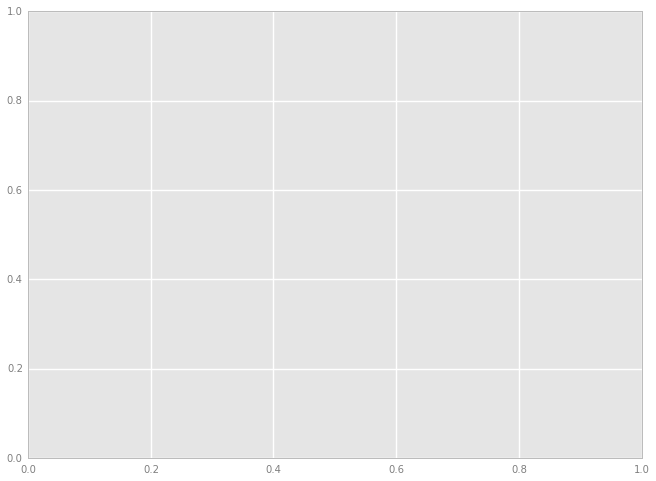

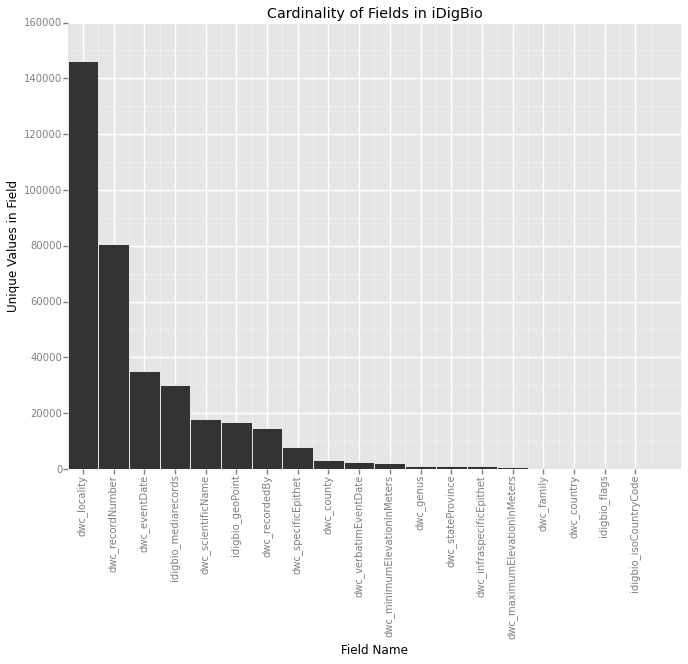

<ggplot: (8783119951141)>

In [120]:
# Sort for plotting and add an integer for the x-axis
cardinalities.sort(columns="card", inplace=True, ascending=False)
cardinalities["x"] = range(0, cardinalities.shape[0])


# small record set sizes: 187      389,196  146,346   80,476        3,180
#                         country  etag     locality  recordNumber  county

p = plot_bar(cardinalities, "card",
             "Cardinality of Fields in iDigBio",
             "Field Name",
             "Unique Values in Field")
p


In [124]:
# Now per-field frequency distributions of values

field = "dwc_country"
print counts[field].head()

p = ggplot(aes(x="count"), data=counts[field]) \
+ geom_histogram()
p

                            value  count
0                             NaN  30506
1  federated states of micronesia     27
2                           samoa    327
3                        pakistan      8
4                  cayman islands      3

[5 rows x 2 columns]


stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


TypeError: pivot_table() got an unexpected keyword argument 'index'